In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath as cm
%matplotlib inline

y_continuous = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + (3*np.pi)/4)

In [36]:
# Continuous time signal

start = 0 
stop = 0.001 
sampling_frequency = 8000
samples_count = sampling_frequency * (stop - start)

# Continuous Signal 
t = np.linspace(start = start, stop = stop, num = int(samples_count))
y_continuous = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

In [37]:
# Discrete Signal
start = 0
stop = 0.001
sampling_frequency = 8000
sampling_rate = 1 / sampling_frequency
N = 8 # Number of samples

# Base 
n = np.arange(start=start, stop=stop, step=sampling_rate)
y_discrete = np.sin(2 * np.pi * 1000 * n) + 0.5 * np.sin(2 * np.pi * 2000 * n + 3 * np.pi / 4)
y_discrete_samples = y_discrete[:N]

print("Sampled n: ", n)
print("Sampled y: ", y_discrete_samples)


Sampled n:  [0.       0.000125 0.00025  0.000375 0.0005   0.000625 0.00075  0.000875]
Sampled y:  [ 0.35355339  0.35355339  0.64644661  1.06066017  0.35355339 -1.06066017
 -1.35355339 -0.35355339]


In [38]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N) :
            X[m] += x[n] * cm.exp(-2j * cm.pi * m * n / N)
    return X        

In [39]:
def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for m in range(N) :
            x[n] += X[m] * cm.exp(2j * cm.pi * m * n / N)
    return x

In [40]:
def make_round_complex(x):
    n = len(x)
    rounded = np.zeros(n, dtype=np.complex128)
    for i in range(N):
        rounded[i] = complex(round(x[i].real, 3) + round(x[i].imag, 3))
    rounded = np.round(rounded, 3)
    return rounded    

In [41]:
def get_phase(x):
    phases =[]
    for i in x:
        temp = cm.phase(round(i.real, 2) + round(i.imag, 2) * 1j)
        phases.append(math.degrees(temp))
        
    return phases    

In [44]:
y_dft = dft(y_discrete_samples)
y_dft_rounded = make_round_complex(y_dft)
y_phases = get_phase(y_dft)
y_idft = idft(y_dft)
y_idft_rounded = make_round_complex(y_idft)

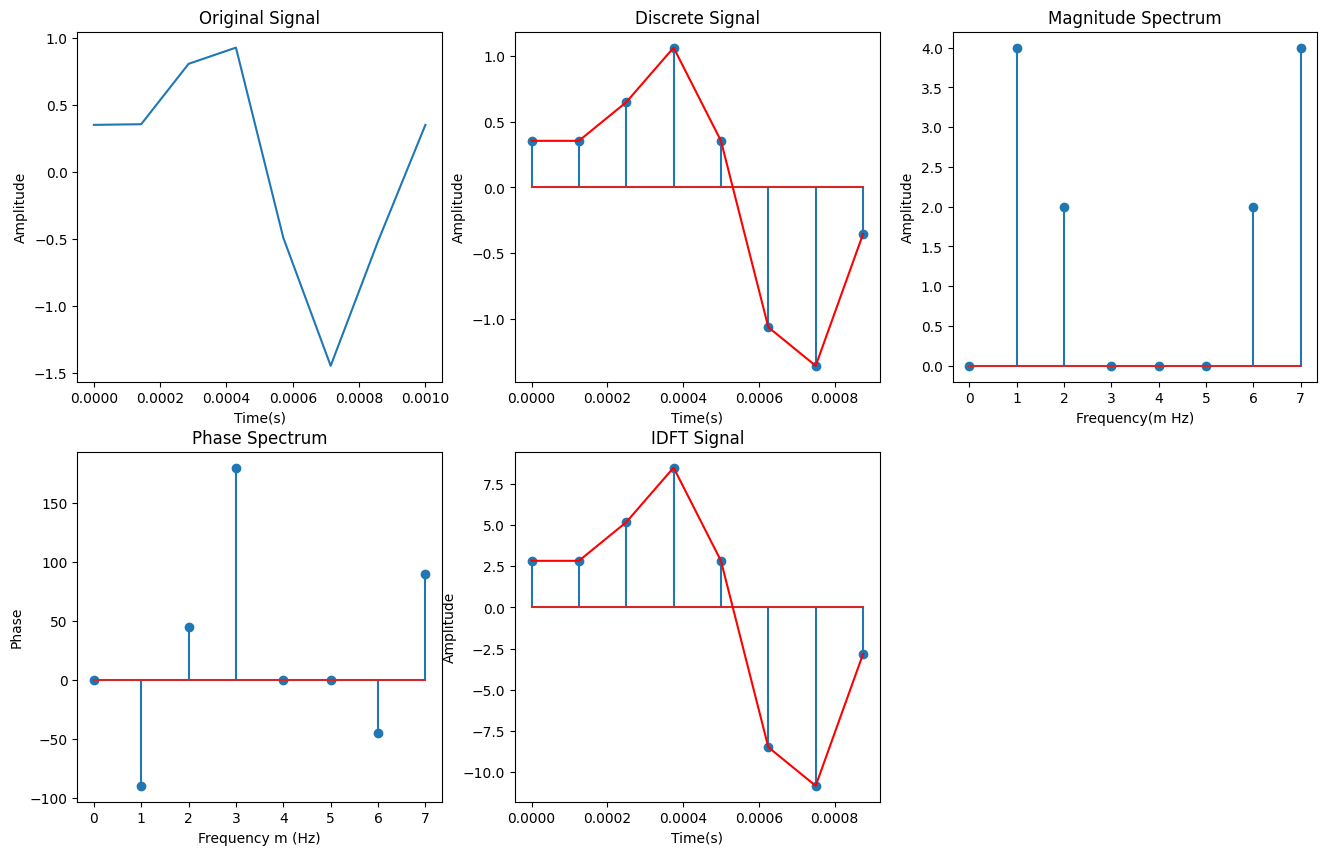

In [45]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title("Original Signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(t, y_continuous)

plt.subplot(2, 3, 2)
plt.title("Discrete Signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.stem(n, y_discrete_samples)
plt.plot(n, y_discrete_samples, 'r')

plt.subplot(2, 3, 3)
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency(m Hz)")
plt.ylabel("Amplitude")
plt.stem(np.abs(y_dft))

plt.subplot(2, 3, 4)
plt.title("Phase Spectrum")
plt.xlabel("Frequency m (Hz)")
plt.ylabel("Phase")
plt.stem(y_phases)


plt.subplot(2, 3, 5)
plt.title("IDFT Signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.stem(n, y_idft_rounded)
plt.plot(n, y_idft_rounded, 'r')